In [2]:
#1. analyzing the reach of my Instagram account by importing the necessary Python libraries and the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Read the data from the csv file
data = pd.read_csv("Instagram data.csv", encoding = 'latin1')
print(data)
print()

     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follo

In [3]:
#2. Check for null / nan values and drop if you fin any
data.isnull().sum()  #there is no null values

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


<ipython-input-4-3a59578ea9fd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


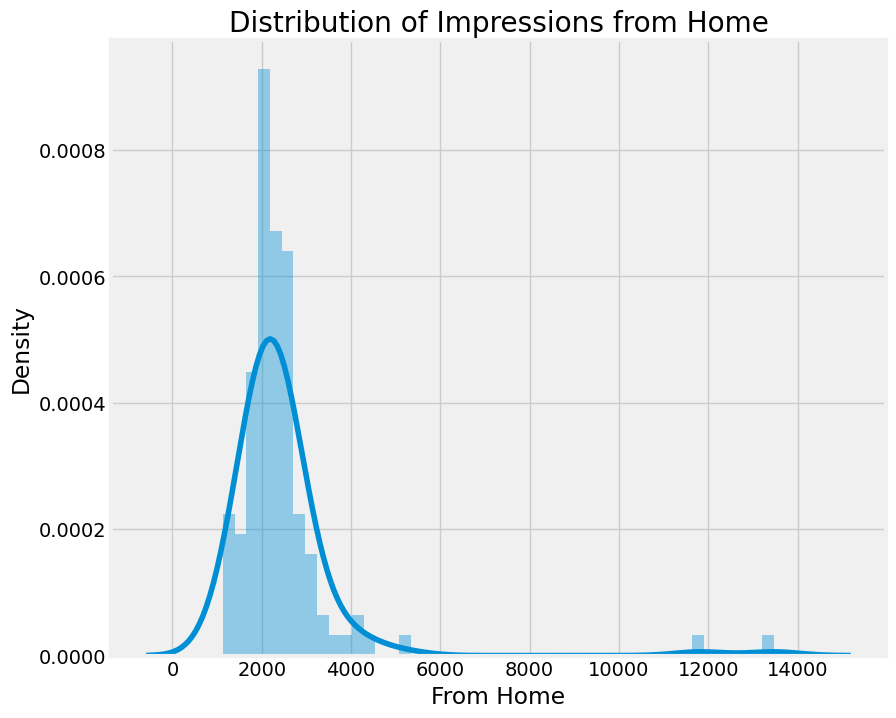

In [4]:
#3. Analyze the distribution of impressions received from home and display it using the distplot of  seaborn.
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(data['From Home'])
plt.show()

<ipython-input-5-b9119ef9f09b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


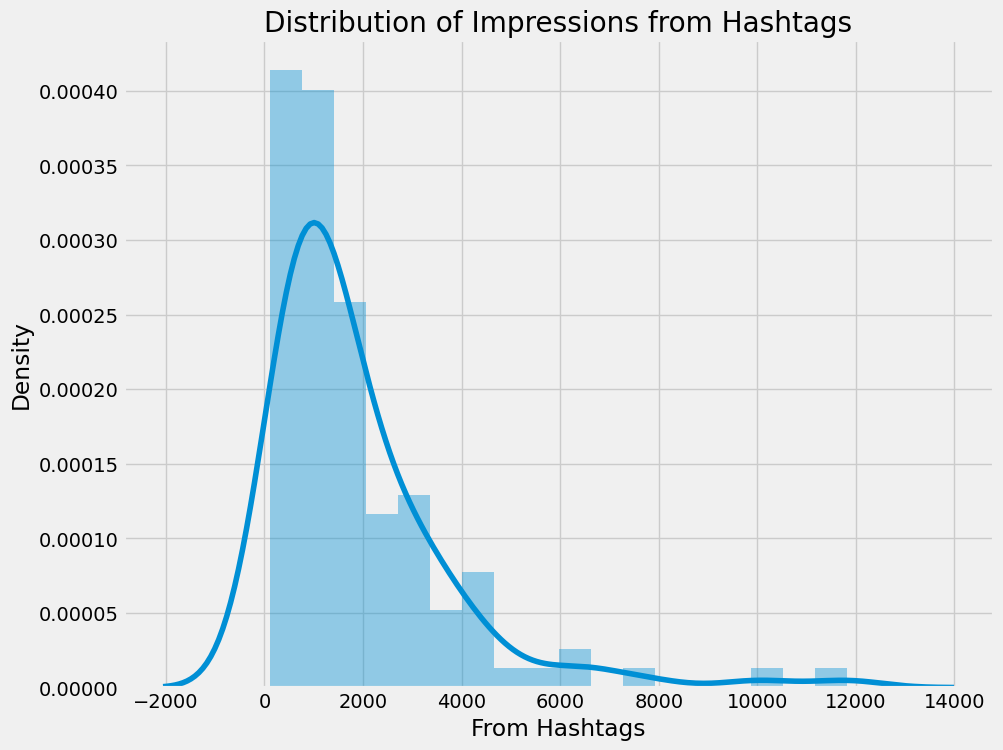

In [5]:
#4. Analyze the distribution of the impressions received from hashtags and display it using the distplot of seaborn.
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

<ipython-input-6-585b5bf5b427>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


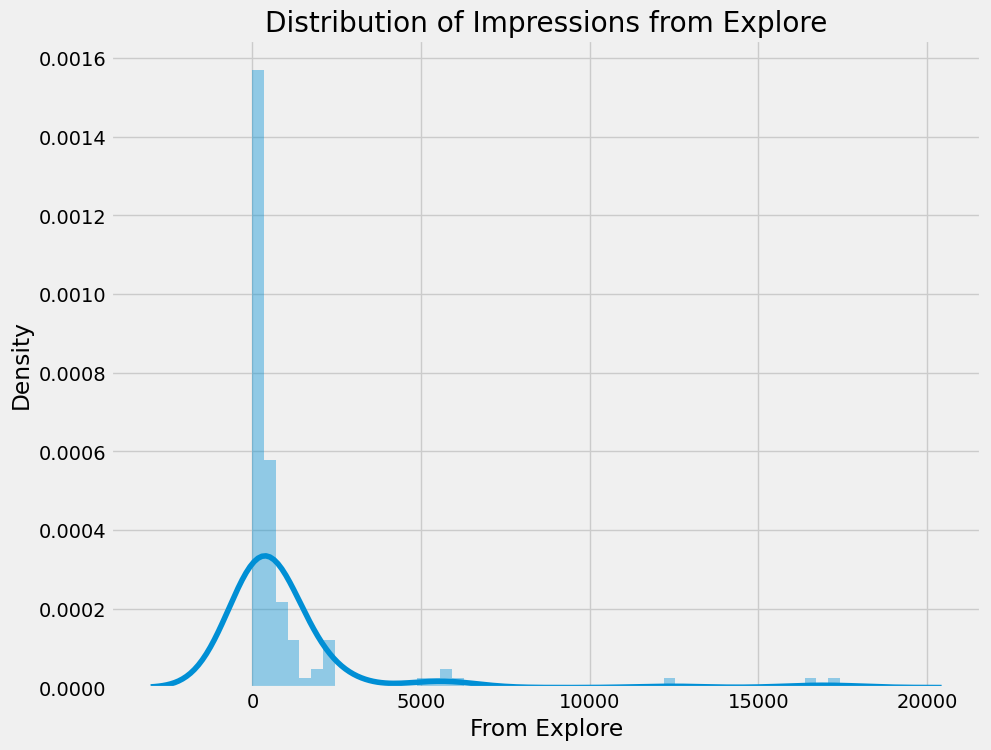

In [6]:
#5.Analyze the distribution of the impressions received from the explore section and display it using the distplot of seaborn.
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.show()

In [7]:
#6. Analyze the percentage of impressions received from various sources and display it as pie chart.
home = data["From Home"].sum()
Hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()
saves = data["Saves"].sum()
comments = data["Comments"].sum()
shares = data["Shares"].sum()
likes = data["Likes"].sum()
profile_visits = data["Profile Visits"].sum()
follows = data["Follows"].sum()

labels = ['From Home','From Hashtags','From Explore','Other','Saves','Comments','Shares',"Likes","Profile Visits","Follows"]
values = [home, Hashtags, explore, other,saves,comments,shares,likes,profile_visits,follows]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', template='plotly_dark')
fig.update_traces(pull=[0.1, 0, 0, 0])
fig.show()

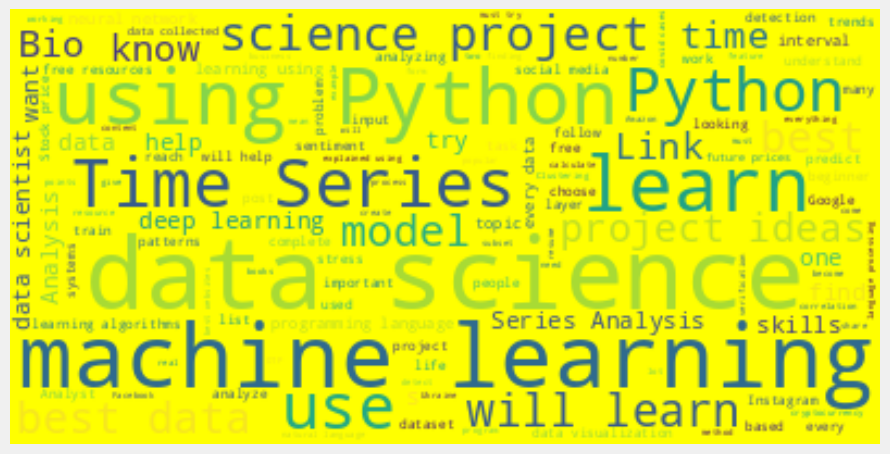

In [8]:
#7.create a wordcloud of the caption column to look at the most used words in the caption of Instagram posts.
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="yellow").generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

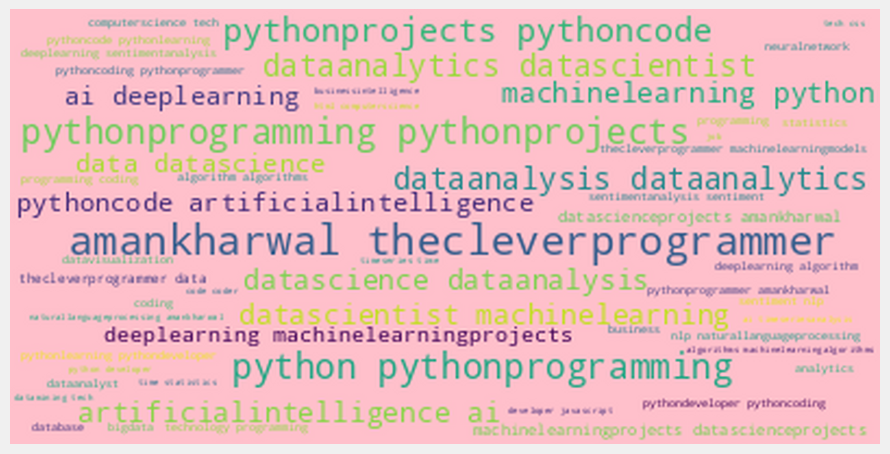

In [9]:
#8.create a wordcloud of the hashtags column to look at the most used hashtags in Instagram posts.
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="pink").generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='blackman')
plt.axis("OFF")
plt.show()

In [10]:
#9.Analyze the relationship between the number of likes and the number of impressions on Instagram posts and display it as scatter chart.
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()


In [11]:
#10.Analyze the relationship between the number of comments and the number of impressions on Instagram posts and display it as scatter chart.
figure = px.scatter(data_frame = data, x="Impressions",y="Comments",
                    size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [12]:
#11.Analyze the relationship between the number of shares and the number of impressions and display it as scatter chart.
figure = px.scatter(data_frame = data, x="Impressions",y="Shares",
                    size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.show()


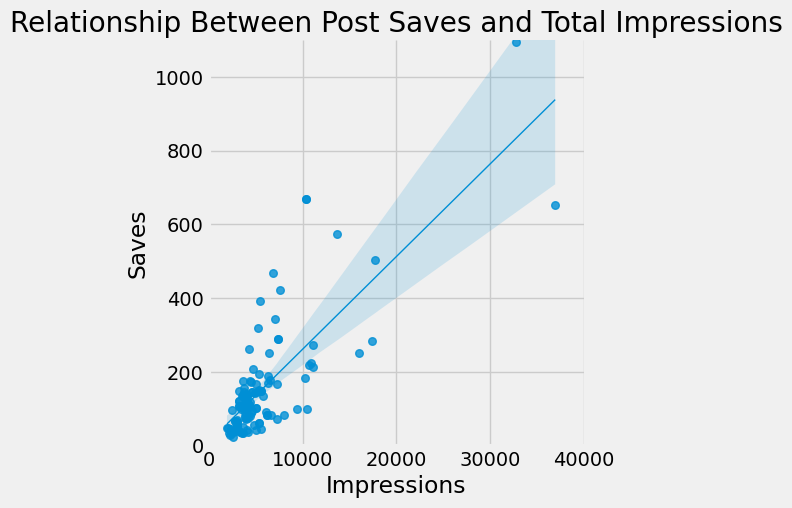

In [13]:
#12. Analyze the relationship between the number of saves and the number of impressions and display it as scatter chart.
sns.lmplot(data, x="Impressions", y="Saves", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Post Saves and Total Impressions")
plt.xlim(0, 40000)
plt.ylim(0, 1100)
plt.show()